In [80]:
# https://raw.githubusercontent.com/ikhwankusuma/AFL2_Ikhwan_datmin/main/customer_analysis.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [81]:
df = pd.read_csv("https://raw.githubusercontent.com/ikhwankusuma/AFL2_Ikhwan_datmin/main/customer_analysis.csv", delimiter = "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [83]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [84]:
df["Age"] = df["Year_Birth"].map(lambda x: 2023 - x)
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["Family_Size"] = np.where((df['Marital_Status'] == "Together") | (df['Marital_Status'] == "Married"), 1, 0) + df["Kidhome"] + df["Teenhome"]
df["Is_Parent"] = np.where((df['Kidhome'] > 0) | (df['Teenhome'] > 0), 1, 0)

cond = [
    (df["Education"] == "PhD"),
    (df["Education"] == "2n Cycle") | (df["Education"] == "Master") | (df["Education"] == "Graduation"),
    (df["Education"] == "Basic")
]
val = ["Doctoral", "Graduate", "Under-graduate"]

df["Education"] = np.select(cond, val)

df = df.drop("Year_Birth", axis=1)
df = df.drop("MntWines", axis=1)
df = df.drop("MntFruits", axis=1)
df = df.drop("MntMeatProducts", axis=1)
df = df.drop("MntFishProducts", axis=1)
df = df.drop("MntSweetProducts", axis=1)
df = df.drop("MntGoldProds", axis=1)
df = df.drop("Kidhome", axis=1)
df = df.drop("Teenhome", axis=1)
df = df.drop("Marital_Status", axis=1)
df = df.drop("Dt_Customer", axis=1)

df.head()

<ipython-input-84-47957229f476>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df["Year_Birth"].map(lambda x: 2023 - x)
<ipython-input-84-47957229f476>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
<ipython-input-84-47957229f476>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,ID,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,Family_Size,Is_Parent
0,5524,Graduate,58138.0,58,3,8,10,4,7,0,...,0,0,3,11,1,66,1617,0,0,0
1,2174,Graduate,46344.0,38,2,1,1,2,5,0,...,0,0,3,11,0,69,27,2,2,1
2,4141,Graduate,71613.0,26,1,8,2,10,4,0,...,0,0,3,11,0,58,776,0,1,0
3,6182,Graduate,26646.0,26,2,2,0,4,6,0,...,0,0,3,11,0,39,53,1,2,1
4,5324,Doctoral,58293.0,94,5,5,3,6,5,0,...,0,0,3,11,0,42,422,1,2,1


In [85]:
le = LabelEncoder()

df['Education'] = le.fit_transform(df['Education'])

df.head()

,ID,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,Family_Size,Is_Parent
0,5524,1,58138.0,58,3,8,10,4,7,0,...,0,0,3,11,1,66,1617,0,0,0
1,2174,1,46344.0,38,2,1,1,2,5,0,...,0,0,3,11,0,69,27,2,2,1
2,4141,1,71613.0,26,1,8,2,10,4,0,...,0,0,3,11,0,58,776,0,1,0
3,6182,1,26646.0,26,2,2,0,4,6,0,...,0,0,3,11,0,39,53,1,2,1
4,5324,0,58293.0,94,5,5,3,6,5,0,...,0,0,3,11,0,42,422,1,2,1


In [86]:
ss = StandardScaler()

data = ss.fit_transform(df)
df = pd.DataFrame(data, columns=df.columns)

df.head()

,ID,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,Family_Size,Is_Parent
0,-0.019809,0.426312,0.234063,0.310532,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,...,-0.117148,-0.097812,0.0,0.0,2.377952,0.986443,1.675488,-1.264803,-1.758673,-1.581389
1,-1.051009,0.426312,-0.234559,-0.380509,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,...,-0.117148,-0.097812,0.0,0.0,-0.420530,1.236801,-0.962358,1.405806,0.450009,0.632356
2,-0.445526,0.426312,0.769478,-0.795134,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,...,-0.117148,-0.097812,0.0,0.0,-0.420530,0.318822,0.280250,-1.264803,-0.654332,-1.581389
3,0.182737,0.426312,-1.017239,-0.795134,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,...,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.266777,-0.919224,0.070501,0.450009,0.632356
4,-0.081373,-1.786117,0.240221,1.554407,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,...,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.016420,-0.307044,0.070501,0.450009,0.632356


In [87]:
d = df

kmeans = KMeans(n_clusters = 5, init = "k-means++").fit(d)

labels = kmeans.fit_predict(d)
d["label"] = labels
d.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,Family_Size,Is_Parent,label
0,-0.019809,0.426312,0.234063,0.310532,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,...,-0.097812,0.0,0.0,2.377952,0.986443,1.675488,-1.264803,-1.758673,-1.581389,4
1,-1.051009,0.426312,-0.234559,-0.380509,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,...,-0.097812,0.0,0.0,-0.420530,1.236801,-0.962358,1.405806,0.450009,0.632356,0
2,-0.445526,0.426312,0.769478,-0.795134,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,...,-0.097812,0.0,0.0,-0.420530,0.318822,0.280250,-1.264803,-0.654332,-1.581389,4
3,0.182737,0.426312,-1.017239,-0.795134,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,...,-0.097812,0.0,0.0,-0.420530,-1.266777,-0.919224,0.070501,0.450009,0.632356,0
4,-0.081373,-1.786117,0.240221,1.554407,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,...,-0.097812,0.0,0.0,-0.420530,-1.016420,-0.307044,0.070501,0.450009,0.632356,2


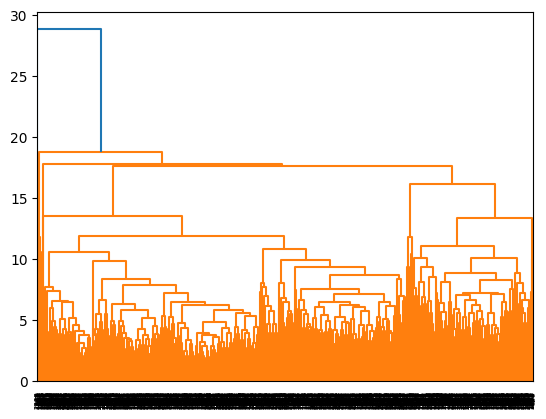

In [88]:
d = df

dendrogram(linkage(d, method = "complete"))
plt.show()

In [89]:
d = df

ac = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "complete")
labels = ac.fit_predict(d)
ulabels = np.unique(labels)
d = pd.DataFrame(d)
d["label"] = labels
d.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,ID,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,Family_Size,Is_Parent,label
0,-0.019809,0.426312,0.234063,0.310532,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,...,-0.097812,0.0,0.0,2.377952,0.986443,1.675488,-1.264803,-1.758673,-1.581389,0
1,-1.051009,0.426312,-0.234559,-0.380509,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,...,-0.097812,0.0,0.0,-0.420530,1.236801,-0.962358,1.405806,0.450009,0.632356,1
2,-0.445526,0.426312,0.769478,-0.795134,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,...,-0.097812,0.0,0.0,-0.420530,0.318822,0.280250,-1.264803,-0.654332,-1.581389,0
3,0.182737,0.426312,-1.017239,-0.795134,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,...,-0.097812,0.0,0.0,-0.420530,-1.266777,-0.919224,0.070501,0.450009,0.632356,1
4,-0.081373,-1.786117,0.240221,1.554407,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,...,-0.097812,0.0,0.0,-0.420530,-1.016420,-0.307044,0.070501,0.450009,0.632356,1
